In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [2]:
df=pd.read_csv("/content/drive/MyDrive/spam.csv",encoding="latin-1")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [5]:
df=df.dropna(how="any",axis=1)

In [6]:
df.columns=['target','message']

In [7]:
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.tail()

,target,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [9]:
df.shape

(5572, 2)

In [10]:
df.columns

Index(['target', 'message'], dtype='object')

In [11]:
df.duplicated().sum()

403

In [12]:
df=df.drop_duplicates()

In [13]:
df.isnull().sum()

target     0
message    0
dtype: int64

In [14]:
df.nunique()

target        2
message    5169
dtype: int64

In [15]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize,sent_tokenize
df['num_char']=df['message'].apply(len)
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,target,message,num_char
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [16]:
df["num_wd"] = df.apply(lambda row: nltk.word_tokenize(row["message"]), axis=1).apply(len)
df["num_sn"] = df.apply(lambda row: nltk.sent_tokenize(row["message"]), axis=1).apply(len)
df.head()

,target,message,num_char,num_wd,num_sn
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [17]:
df.head()

,target,message,num_char,num_wd,num_sn
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_char,5169.0,78.977945,58.236293,2.0,36.0,60.0,117.0,910.0
num_wd,5169.0,18.455794,13.324758,1.0,9.0,15.0,26.0,220.0
num_sn,5169.0,1.965564,1.448541,1.0,1.0,1.0,2.0,38.0


**EDA**

In [19]:
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings('ignore')

In [20]:
df['target'].unique()

array(['ham', 'spam'], dtype=object)

In [21]:
df['target'].value_counts()

ham     4516
spam     653
Name: target, dtype: int64

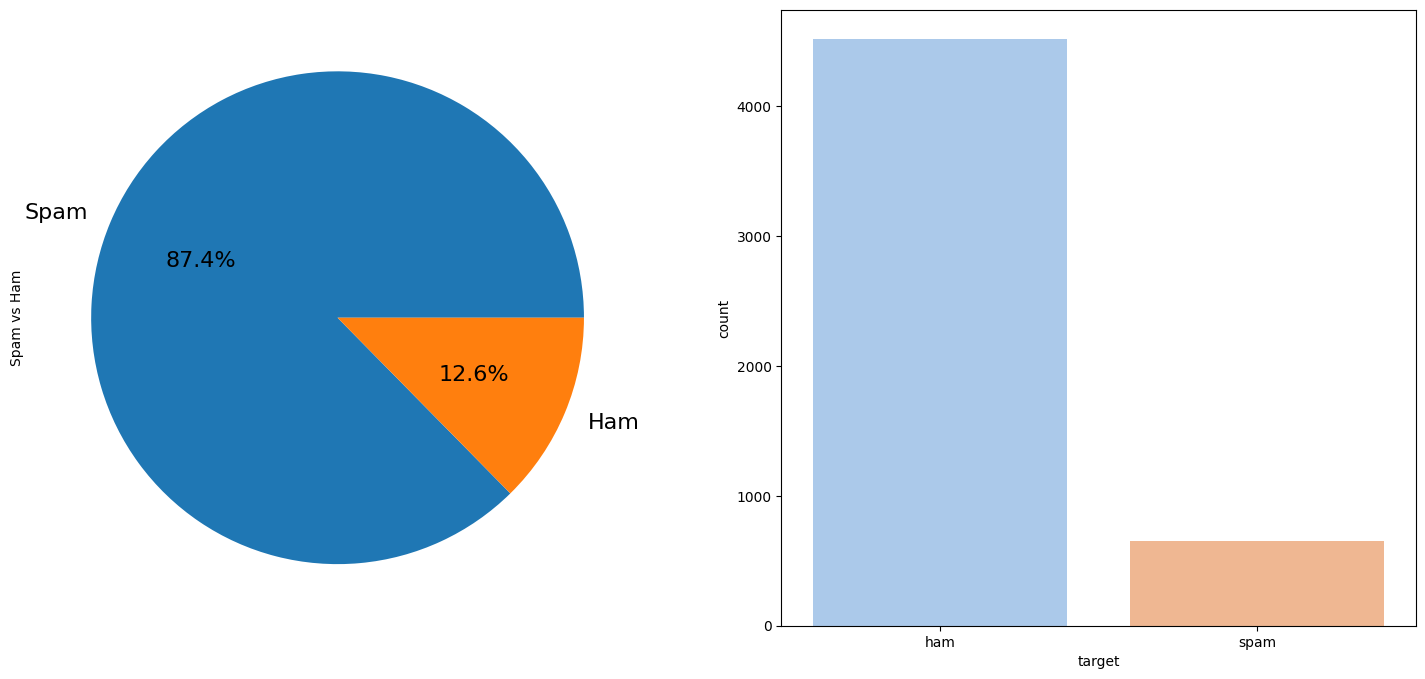

In [22]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
df.target.value_counts().plot(kind="pie",
                          fontsize=16,                  
                          labels=["Spam", "Ham"],
                          ylabel="Spam vs Ham",
                          autopct='%1.1f%%');

plt.subplot(1, 2, 2)
sns.countplot(x="target",data=df, palette="pastel")
plt.show()

In [23]:
balance_counts = df.groupby('target')['target'].agg('count').values
balance_counts

array([4516,  653])

In [24]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=['ham'],
    y=[balance_counts[0]],
    name='ham',
    text=[balance_counts[0]],
    textposition='auto',
    marker_color= 'blue'
))
fig.add_trace(go.Bar(
    x=['spam'],
    y=[balance_counts[1]],
    name='spam',
    text=[balance_counts[1]],
    textposition='auto',
    marker_color= 'red'
))
fig.update_layout(
    title='<span style="font-size:32px; font-family:Times New Roman">Dataset distribution by target</span>'
)
fig.show()

In [25]:
ham_df = df[df['target'] == 'ham']['num_wd'].value_counts().sort_index()
spam_df = df[df['target'] == 'spam']['num_wd'].value_counts().sort_index()

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=ham_df.index,
    y=ham_df.values,
    name='ham',
    fill='tozeroy',
    marker_color= 'blue',
))
fig.add_trace(go.Scatter(
    x=spam_df.index,
    y=spam_df.values,
    name='spam',
    fill='tozeroy',
    marker_color= 'red',
))
fig.update_layout(
    title='<span style="font-size:32px; font-family:Times New Roman">Data Distribution in Different Fields</span>'
)
fig.update_xaxes(range=[0, 70])
fig.show()

<Axes: title={'center': 'Comparision between the classes'}, xlabel='target'>

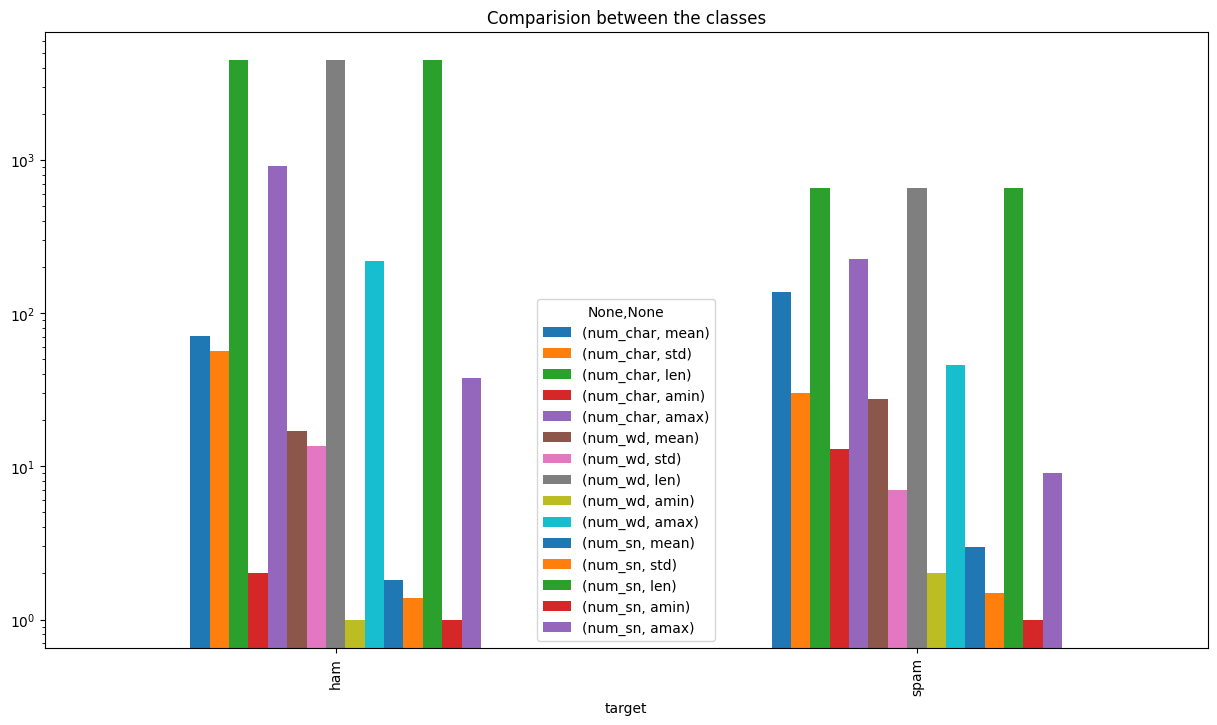

In [26]:
view=df.groupby('target').agg([np.mean,np.std,len,np.min,np.max])
view.plot(kind='bar',figsize=(15,8),title='Comparision between the classes',logy=True)

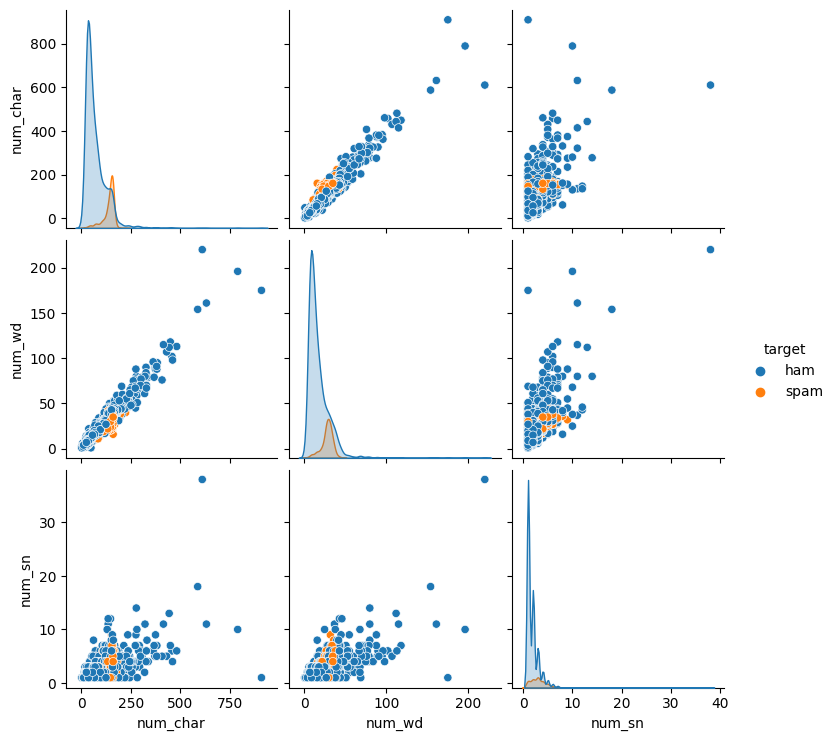

In [27]:
sns.pairplot(df,hue='target')

**Data Preprocessing**

In [28]:
def clean_text(text):
    text = text.lower() 
    return text.strip()

In [29]:
df['new_message'] = df.message.apply(lambda x: clean_text(x))

In [30]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [31]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
df['new_message']= df['new_message'].apply(lambda x:remove_punctuation(x))

In [32]:
import re
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens
df['new_message']= df['new_message'].apply(lambda x: tokenization(x))

In [33]:
import nltk
nltk.download('stopwords')


stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [34]:
def remove_stopwords(text):
    output= " ".join(i for i in text if i not in stopwords)
    return output

In [35]:
df['new_message']= df['new_message'].apply(lambda x:remove_stopwords(x))

In [36]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

In [37]:
def stemming(text):
    stem_text = "".join([porter_stemmer.stem(word) for word in text])
    return stem_text
df['new_message']=df['new_message'].apply(lambda x: stemming(x))

In [38]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
from spacy import load

In [39]:
nltk.download('wordnet')
nltk.download('wordnet2022')
nlp = load('en_core_web_sm')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package wordnet2022 to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet2022.zip.


In [40]:
def lemmatizer(text):
    lemm_text = "".join([wordnet_lemmatizer.lemmatize(word) for word in text])
    return lemm_text
df['new_message']=df['new_message'].apply(lambda x:lemmatizer(x))

In [41]:
def clean_text(text):
    text = re.sub('\[.*\]','', text).strip() # Remove text in square brackets
    text = re.sub('\S*\d\S*\s*','', text).strip()  # Remove words containing numbers
    return text.strip()

In [42]:
df['new_message'] = df.new_message.apply(lambda x: clean_text(x))

In [43]:
stopwords = nlp.Defaults.stop_words
def lemmatizer(text):
    doc = nlp(text)
    sent = [token.lemma_ for token in doc if not token.text in set(stopwords)]
    return ' '.join(sent)

In [44]:
df['new_message'] =  df.new_message.apply(lambda x: lemmatizer(x))

In [45]:
def remove_urls(vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)

In [46]:
df['new_message'] = df.new_message.apply(lambda x: remove_urls(x))


In [47]:
def remove_digits(text):
    clean_text = re.sub(r"\b[0-9]+\b\s*", "", text)
    return(text)

In [48]:
df['new_message'] = df.new_message.apply(lambda x: remove_digits(x))

In [49]:
def remove_digits1(sample_text):
    clean_text = " ".join([w for w in sample_text.split() if not w.isdigit()]) # Side effect: removes extra spaces
    return(clean_text)

In [50]:
df['new_message'] = df.new_message.apply(lambda x: remove_digits1(x))

In [51]:
def remove_emojis(data):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return re.sub(emoji_pattern, '', data)

In [52]:
df['new_message'] = df.new_message.apply(lambda x: remove_emojis(x))

In [53]:
df['new_message']

0       jurong point crazy available bugis n great wor...
1                                   ok lar joke wif u oni
2       free entry wkly comp win fa cup final tkts tex...
3                                     u dun early hor u c
4                               nah not think go usf live
                              ...                        
5567    time try contact u u win pound prize claim eas...
5568                             ì b go esplanade fr home
5569                           pity mood soany suggestion
5570    guy bitching act like d interested buy week gi...
5571                                            rofl true
Name: new_message, Length: 5169, dtype: object

In [54]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['target'])

df['target_encoded'] = le.transform(df['target'])
df.head()

,target,message,num_char,num_wd,num_sn,new_message,target_encoded
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,jurong point crazy available bugis n great wor...,0
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry wkly comp win fa cup final tkts tex...,1
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun early hor u c,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah not think go usf live,0


In [55]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

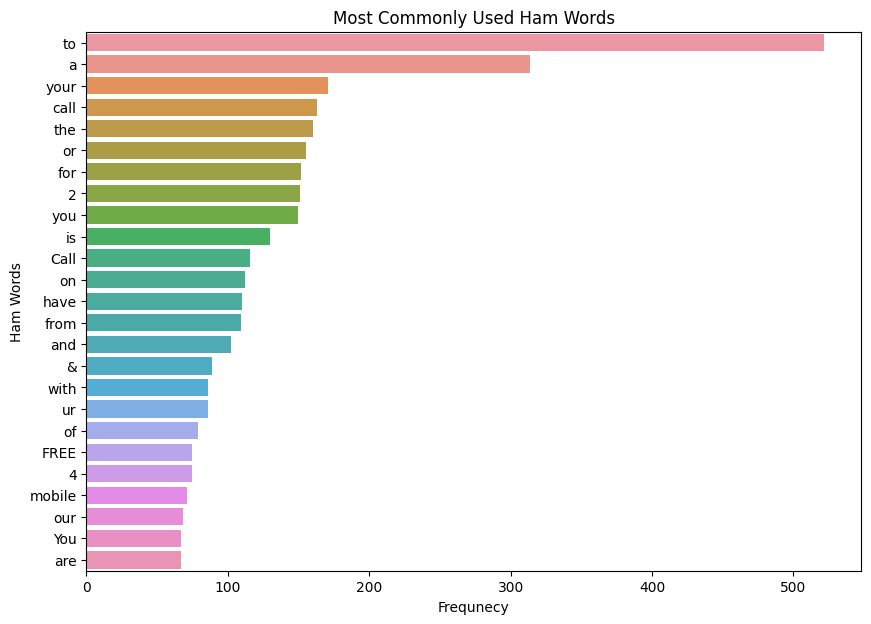

In [56]:
#https://www.kaggle.com/code/karanchinchpure/nlp-pipeline-details-explained#1.1-Feature-Engineering
#create spam corpus which will holds all Spam words
spam_corpus = []
for msg in df[df['target_encoded'] == 1]['message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
from collections import Counter
plt.figure(figsize=(10,7))
sns.barplot(y=pd.DataFrame(Counter(spam_corpus).most_common(25))[0],x=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks()
plt.title("Most Commonly Used Ham Words")
plt.xlabel("Frequnecy")
plt.ylabel("Ham Words")
plt.show()

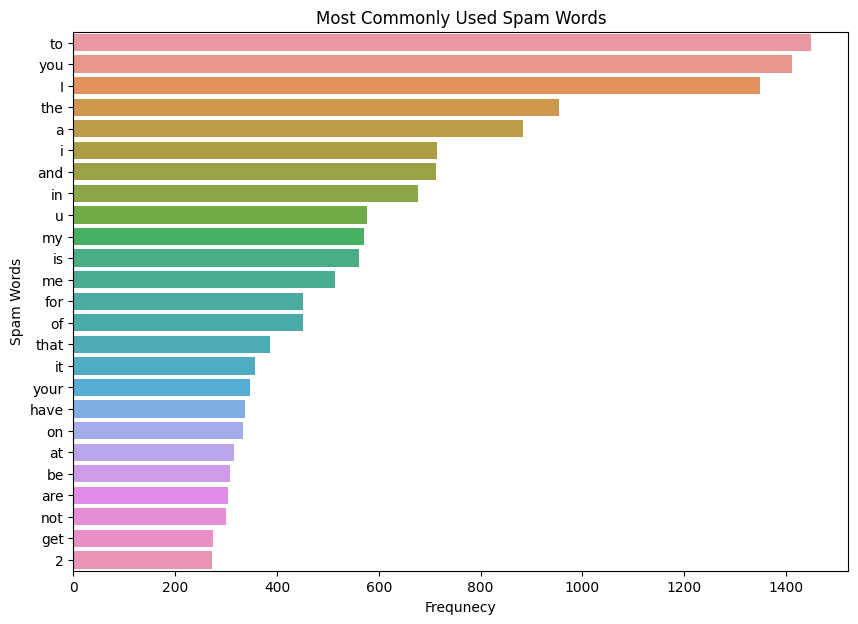

In [57]:
#https://www.kaggle.com/code/karanchinchpure/nlp-pipeline-details-explained#1.1-Feature-Engineering
#create spam corpus which will holds all Ham or Non Spam words
ham_corpus = []
for msg in df[df['target_encoded'] == 0]['message'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
from collections import Counter
plt.figure(figsize=(10,7))
sns.barplot(y=pd.DataFrame(Counter(ham_corpus).most_common(25))[0],x=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks()
plt.title("Most Commonly Used Spam Words")
plt.xlabel("Frequnecy")
plt.ylabel("Spam Words")
plt.show()

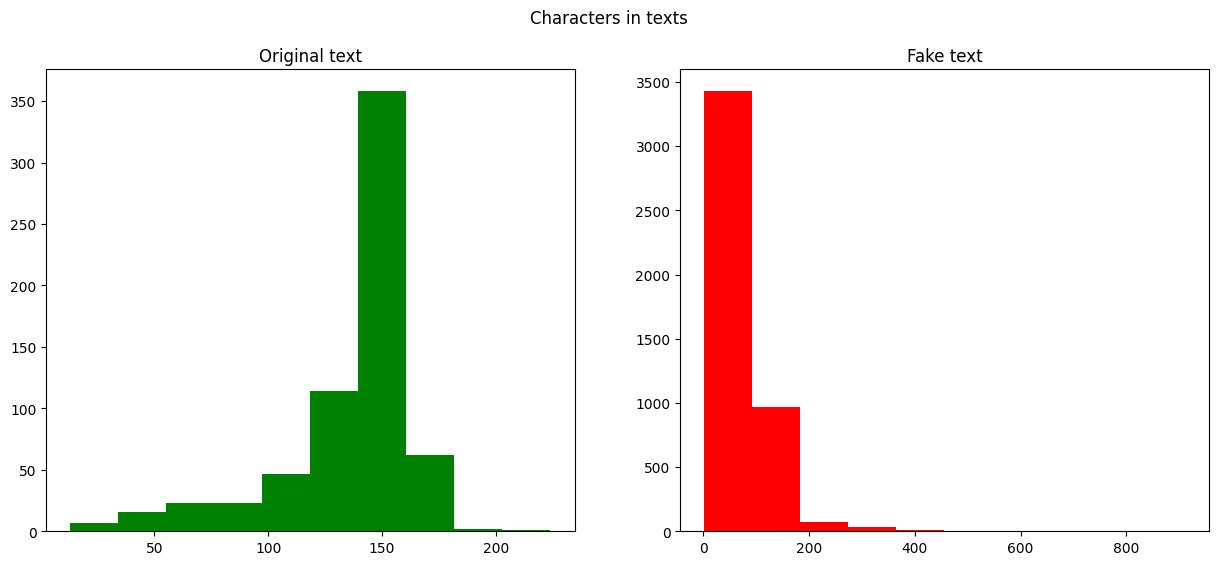

In [58]:
#https://www.kaggle.com/code/karanchinchpure/nlp-pipeline-details-explained#1.1-Feature-Engineering
#Characters Visualize
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
text_len=df[df['target_encoded']==1]['num_char']
ax1.hist(text_len,color='green')
ax1.set_title('Original text')
text_len=df[df['target_encoded']==0]['num_char']
ax2.hist(text_len,color='red')
ax2.set_title('Fake text')
fig.suptitle('Characters in texts')
plt.show()

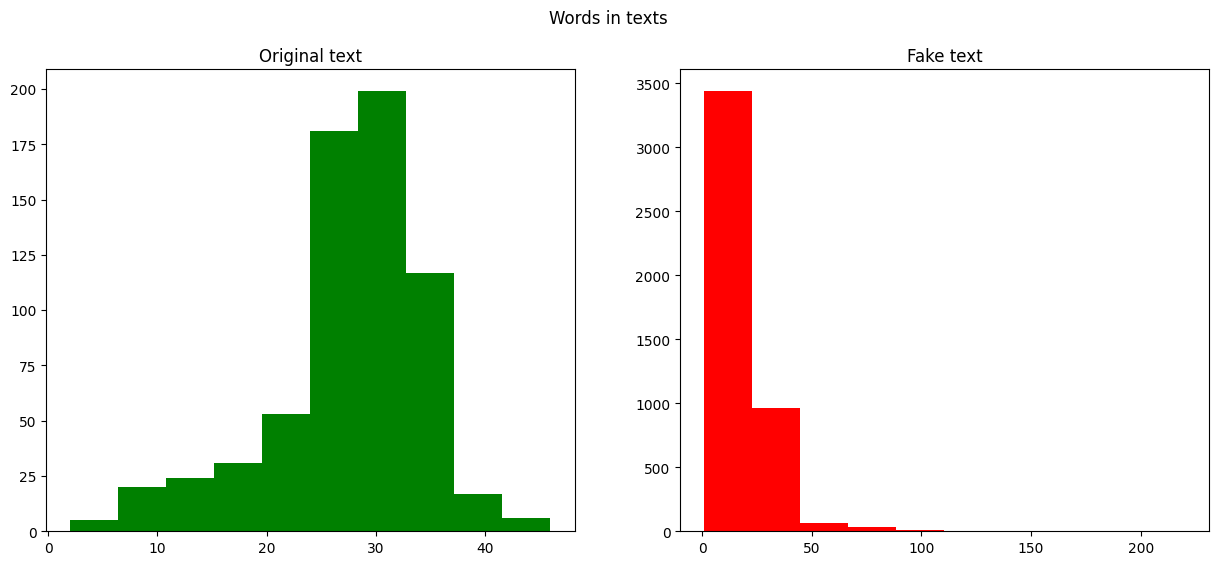

In [59]:
#https://www.kaggle.com/code/karanchinchpure/nlp-pipeline-details-explained#1.1-Feature-Engineering
#Words Visualize
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
text_len=df[df['target_encoded']==1]['num_wd']
ax1.hist(text_len,color='green')
ax1.set_title('Original text')
text_len=df[df['target_encoded']==0]['num_wd']
ax2.hist(text_len,color='red')
ax2.set_title('Fake text')
fig.suptitle('Words in texts')
plt.show()

In [60]:
x = df['new_message']
y = df['target_encoded']

print(len(x), len(y))

5169 5169


In [61]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

3876 3876
1293 1293


In [62]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [63]:
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

In [64]:
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)

In [65]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

tfidf_transformer.fit(x_train_dtm)
x_train_tfidf = tfidf_transformer.transform(x_train_dtm)

x_train_tfidf

<3876x5809 sparse matrix of type '<class 'numpy.float64'>'
	with 26345 stored elements in Compressed Sparse Row format>

In [66]:
texts = df['new_message']
target = df['target_encoded']

In [67]:
from keras.preprocessing.text import Tokenizer

In [68]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(texts)

vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

6964

In [69]:
import tensorflow as tf

In [70]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [71]:
from nltk.tokenize import word_tokenize

In [72]:
def embed(corpus): 
    return word_tokenizer.texts_to_sequences(corpus)

longest_train = max(texts, key=lambda sentence: len(word_tokenize(sentence)))
length_long_sentence = len(word_tokenize(longest_train))

train_padded_sentences = pad_sequences(
    embed(texts), 
    length_long_sentence, 
    padding='post'
)

train_padded_sentences

array([[2778,  217,  400, ...,    0,    0,    0],
       [  12,  182,  466, ...,    0,    0,    0],
       [  13,  333,  674, ...,    0,    0,    0],
       ...,
       [6961, 1228, 6962, ...,    0,    0,    0],
       [ 110, 6963, 1355, ...,    0,    0,    0],
       [1699,  355,    0, ...,    0,    0,    0]], dtype=int32)

In [73]:
import plotly.figure_factory as ff

x_axes = ['Ham', 'Spam']
y_axes =  ['Spam', 'Ham']

def conf_matrix(z, x=x_axes, y=y_axes):
    
    z = np.flip(z, 0)

    # change each element of z to type string for annotations
    z_text = [[str(y) for y in x] for x in z]

    # set up figure 
    fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')
     # add title
    fig.update_layout(title_text='<b>Confusion matrix</b>',
                      xaxis = dict(title='Predicted value'),
                      yaxis = dict(title='Real value')
                     )

    # add colorbar
    fig['data'][0]['showscale'] = True
    
    return fig

In [74]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

# Train the model
nb.fit(x_train_dtm, y_train)

MultinomialNB()

**Naive Bayes DTM**

In [75]:
y_pred_class = nb.predict(x_test_dtm)
y_pred_prob = nb.predict_proba(x_test_dtm)[:, 1]

In [76]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

conf_matrix(metrics.confusion_matrix(y_test, y_pred_class))

0.9752513534416086


**Naive Bayes**

In [77]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('bow', CountVectorizer()), 
                 ('tfid', TfidfTransformer()),  
                 ('model', MultinomialNB())])

In [78]:
pipe.fit(x_train, y_train)

y_pred_class = pipe.predict(x_test)

print(metrics.accuracy_score(y_test, y_pred_class))

conf_matrix(metrics.confusion_matrix(y_test, y_pred_class))

0.9551430781129157


**XGBoost**

In [79]:
import xgboost as xgb

pipe = Pipeline([
    ('bow', CountVectorizer()), 
    ('tfid', TfidfTransformer()),  
    ('model', xgb.XGBClassifier(
        learning_rate=0.1,
        max_depth=7,
        n_estimators=80,
        use_label_encoder=False,
        eval_metric='auc',
        colsample_bytree=0.8,
        subsample=0.7,
        min_child_weight=5,
    ))
])

In [80]:
pipe.fit(x_train, y_train)

y_pred_class = pipe.predict(x_test)
y_pred_train = pipe.predict(x_train)

print('Train: {}'.format(metrics.accuracy_score(y_train, y_pred_train)))
print('Test: {}'.format(metrics.accuracy_score(y_test, y_pred_class)))

conf_matrix(metrics.confusion_matrix(y_test, y_pred_class))

Train: 0.9574303405572755
Test: 0.94276875483372


**RandomForestClassifier**

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

pipe = Pipeline([('bow', CountVectorizer()), 
                 ('tfid', TfidfTransformer()),  
                 ('model', RandomForestClassifier(n_estimators=50, random_state=2))])

In [82]:
pipe.fit(x_train, y_train)

y_pred_class = pipe.predict(x_test)

print(metrics.accuracy_score(y_test, y_pred_class))

conf_matrix(metrics.confusion_matrix(y_test, y_pred_class))

0.9651972157772621


**SVM**

In [83]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

pipe = Pipeline([('bow', CountVectorizer()), 
                 ('tfid', TfidfTransformer()),  
                 ('model', SVC(kernel='sigmoid', gamma=1.0))])

In [84]:
pipe.fit(x_train, y_train)

y_pred_class = pipe.predict(x_test)

print(metrics.accuracy_score(y_test, y_pred_class))

conf_matrix(metrics.confusion_matrix(y_test, y_pred_class))

0.9791183294663574


In [85]:
X_train, X_test, y_train, y_test = train_test_split(
    train_padded_sentences, 
    target, 
    test_size=0.25
)

**LSTM**

In [86]:
import tensorflow
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, GlobalMaxPool1D, BatchNormalization, Dropout, Dense
import numpy as np
from tensorflow.keras.layers import Embedding
import keras
from keras.models import Sequential
from keras.initializers import Constant
from keras.layers import (LSTM, 
                          Embedding, 
                          BatchNormalization,
                          Dense, 
                          TimeDistributed, 
                          Dropout, 
                          Bidirectional,
                          Flatten, 
                          GlobalMaxPool1D)
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import (
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report,
    accuracy_score
)